In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PepperbellVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2368 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Unknown']

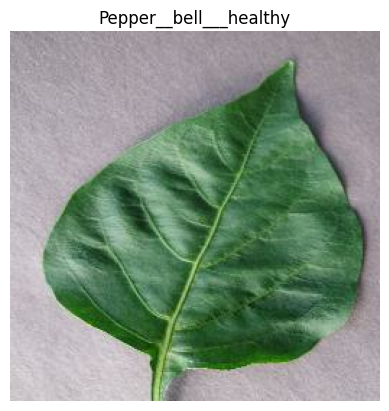

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

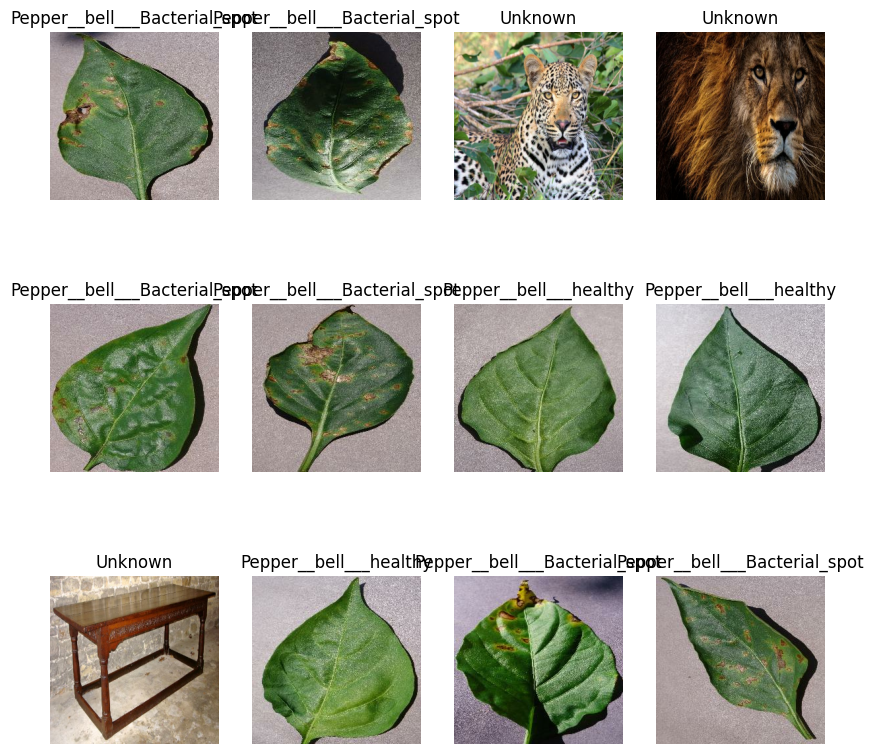

In [6]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(dataset, training_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    training_size = int(training_split * ds_size)
    val_size = int(val_split * ds_size)
    training_ds = dataset.take(training_size)
    val_ds = dataset.skip(training_size).take(val_size)
    test_ds = dataset.skip(training_size).skip(val_size)
    return training_ds, val_ds, test_ds

training_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
len(training_ds)

59

In [9]:
len(val_ds)

7

In [10]:
len(test_ds)

8

In [11]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    ])
model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [22]:
history = model.fit(
    training_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.4857 - loss: 0.9587 - val_accuracy: 0.7723 - val_loss: 0.6342
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7941 - loss: 0.5047 - val_accuracy: 0.8839 - val_loss: 0.3204
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8644 - loss: 0.3532 - val_accuracy: 0.9196 - val_loss: 0.1983
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8780 - loss: 0.3067 - val_accuracy: 0.9509 - val_loss: 0.1714
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9377 - loss: 0.1990 - val_accuracy: 0.9286 - val_loss: 0.2031
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.9312 - loss: 0.1997 - val_accuracy: 0.9643 - val_loss: 0.1269
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9506 - loss: 0.1468 - val_accuracy: 0.9777 - val_loss: 0.0896
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9496 - loss: 0.1397 - val_accuracy: 0.9420 - v

In [23]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 885ms/step - accuracy: 0.9732 - loss: 0.0973


In [24]:
scores

[0.05632367357611656, 0.98046875]

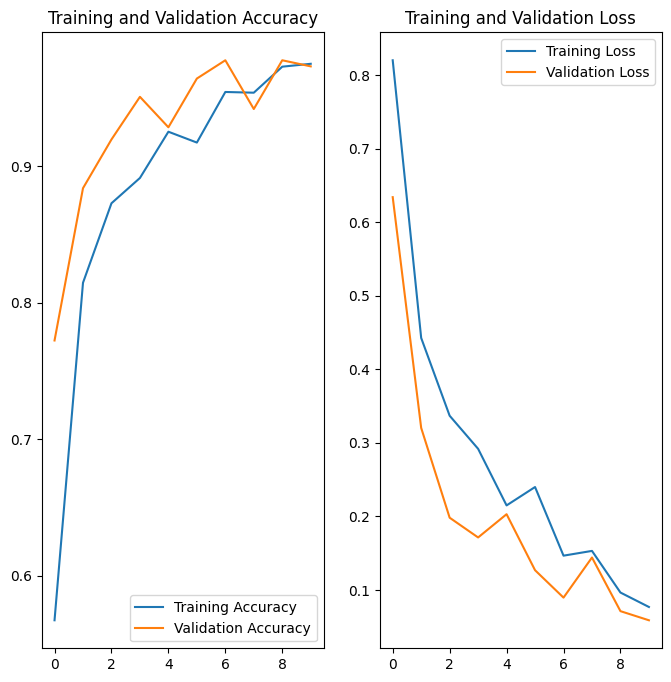

In [25]:
# Plotting a matplotlib chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual_label: Pepper__bell___healthy


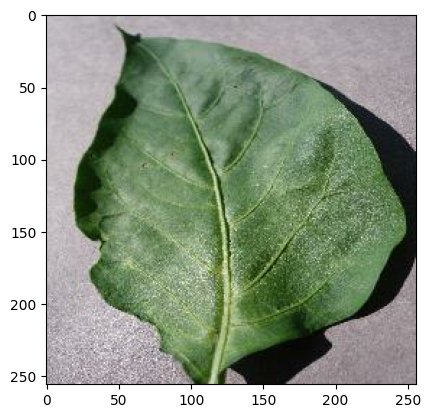

In [26]:
# Getting the actual label of our image
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:", class_names[first_label])

In [27]:
batch_prediction = model.predict(image_batch)
# converting it to a class name
print("predicted_leabel:", class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted_leabel: Pepper__bell___Bacterial_spot


In [28]:
# function that takes the model and image and highlights what is the predicted class and confidence
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


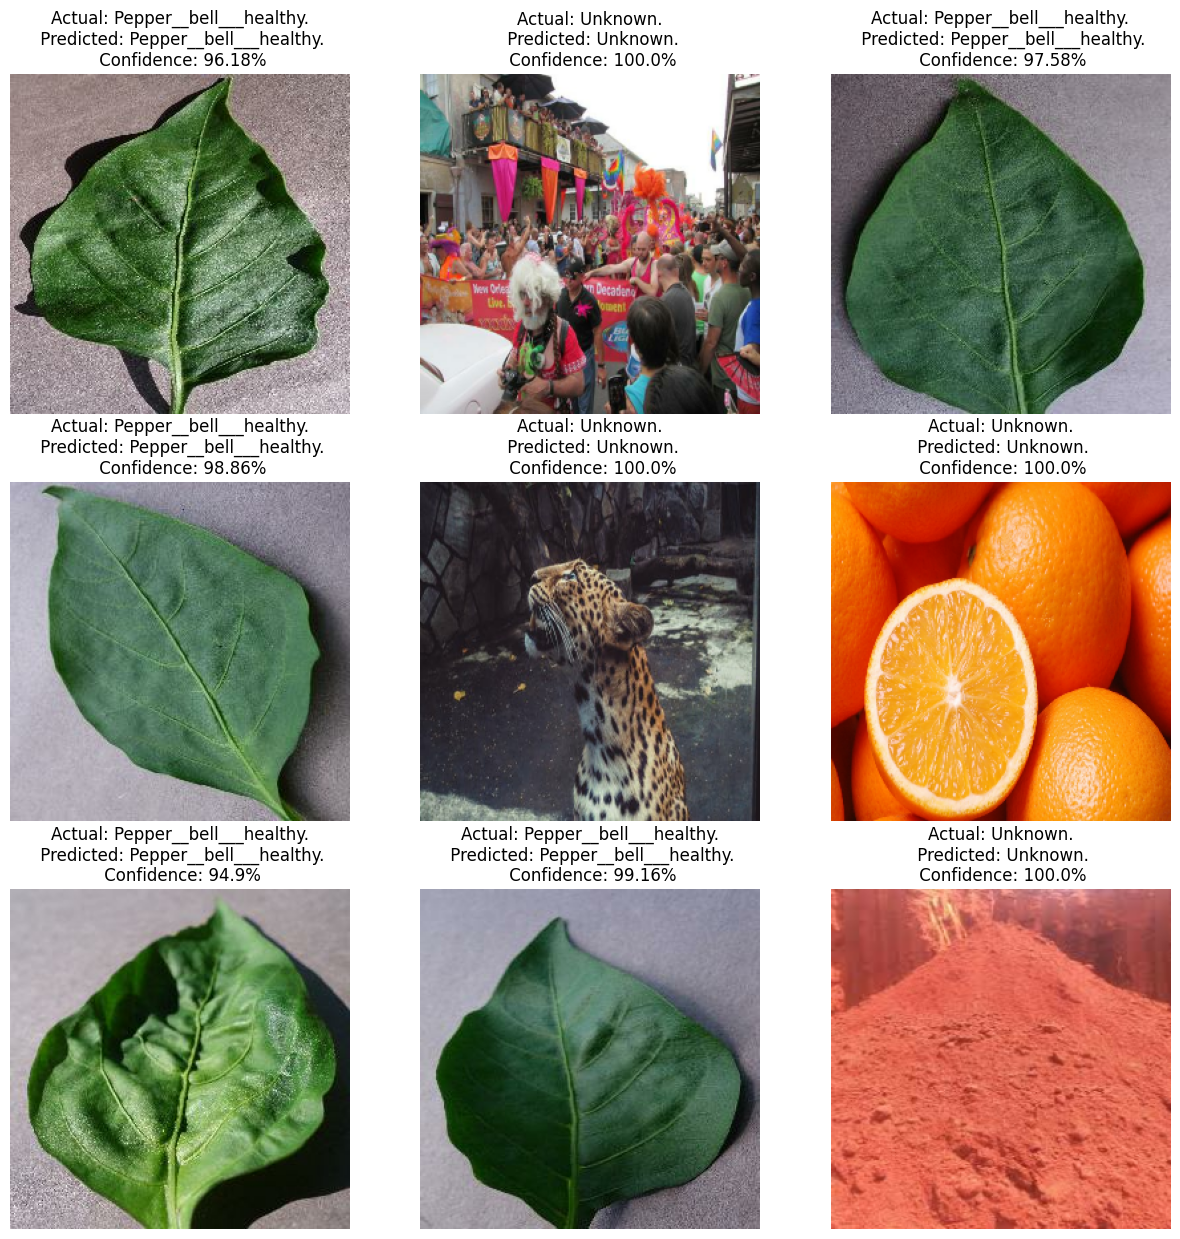

In [29]:
# Taking images from the test_ds and using the predict model to predict images and highlight the confidence
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
   for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}.\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [30]:
import os

model_version = max([int(i.split('.')[0]) for i in os.listdir("../pepperbell") if i.split('.')[0].isdigit()] + [0]) + 1
model.export(f"../pepperbell/{model_version}")

INFO:tensorflow:Assets written to: ../pepperbell/1\assets


INFO:tensorflow:Assets written to: ../pepperbell/1\assets


Saved artifact at '../pepperbell/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2348810804864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348810805040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257677600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257678832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257677952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257679184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257678656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257679536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257679008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257679888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2347257679360: TensorSpec(shape=